In [4]:
#Monte carlo- Forecasting stock prices - Part 1

In [55]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [111]:
ticker ='MRO'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [112]:
data

,MRO
Date,
2010-01-04,15.502111
2010-01-05,15.516592
2010-01-06,15.859372
2010-01-07,15.762804
2010-01-08,15.786951
...,...
2020-09-24,4.310000
2020-09-25,4.140000
2020-09-28,4.290000


In [58]:
#easy formula for log returns

In [59]:
log_returns = np.log(1 + data.pct_change())

In [60]:
log_returns.tail()

,MRO
Date,
2020-09-22,-0.019934
2020-09-23,-0.059926
2020-09-24,0.023475
2020-09-25,-0.040242
2020-09-28,0.035591


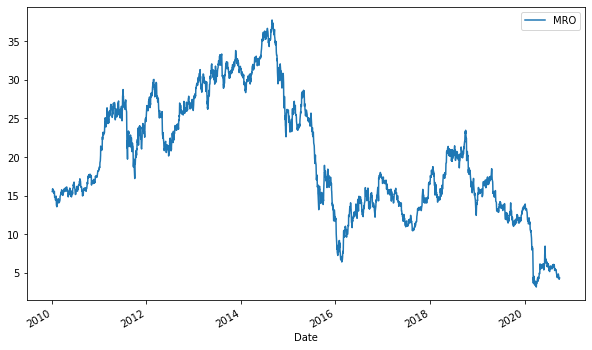

In [61]:
data.plot(figsize=(10,6))

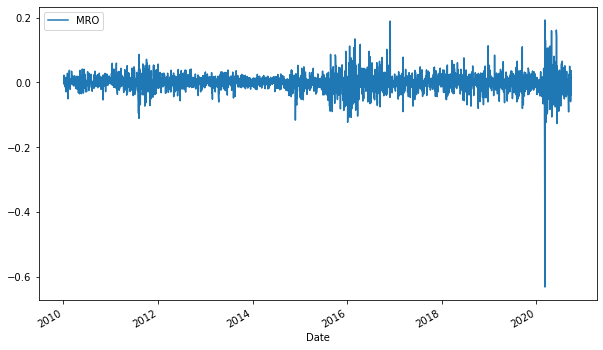

In [62]:
log_returns.plot(figsize= (10,6))

Text(0, 0.5, 'Frequency')

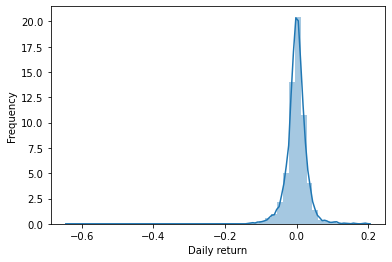

In [63]:
#plot of daily returns histogram
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily return")
plt.ylabel("Frequency")



In [64]:
u = log_returns.mean()

In [65]:
u

MRO   -0.000475
dtype: float64

In [66]:
var = log_returns.var()
var

MRO    0.000917
dtype: float64

In [67]:
#formula 
#price today = price yesterday * e^r
# r = drift+stdev* z

In [68]:
#Drift = u + 0.5(var)

In [69]:
drift = u + (0.5*var)
drift

MRO   -0.000017
dtype: float64

In [70]:
stdev = log_returns.std()
stdev

MRO    0.030279
dtype: float64

In [71]:
type(drift)

pandas.core.series.Series

In [72]:
type(stdev)

pandas.core.series.Series

In [73]:
np.array(drift)

array([-1.70392935e-05])

In [74]:
drift.values

array([-1.70392935e-05])

In [75]:
stdev.values

array([0.03027935])

In [76]:
norm.ppf(0.95)

1.6448536269514722

In [77]:
x = np.random.rand(10,2)
x

array([[0.95113782, 0.34120767],
       [0.55648909, 0.09748034],
       [0.41207143, 0.90714149],
       [0.12898228, 0.66202714],
       [0.81474904, 0.20333015],
       [0.50773012, 0.92555234],
       [0.67754994, 0.38441904],
       [0.799028  , 0.92485288],
       [0.25125729, 0.00336791],
       [0.25216378, 0.91580817]])

In [78]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.91797201, -0.40908524],
       [ 1.43334846,  0.25061452],
       [-0.90699388,  1.01787289],
       [ 0.22636491, -1.08186503],
       [ 1.66714551, -0.66377697],
       [-0.30630328, -0.35359085],
       [ 2.23376249, -0.31276877],
       [-1.18932959,  0.97858779],
       [-0.13460544, -0.25619995],
       [ 0.39581951, -0.53560848]])

In [79]:
t_intervals = 252
iterations = 1000

In [80]:
#daily_returns = e^r
#r = drift + stdev * z
# z = norm.ppf(np.raandom.rand(t_intervals, iterations))

In [81]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00774998, 1.07633427, 1.00924336, ..., 1.01668999, 0.99719388,
        1.02841418],
       [0.9590269 , 0.97718514, 0.97923974, ..., 1.03647024, 1.04102292,
        1.05565606],
       [1.02200836, 1.03945885, 0.99808945, ..., 1.01103583, 0.97768598,
        1.00843374],
       ...,
       [0.99076016, 0.99268677, 1.03227506, ..., 0.95826877, 1.00358227,
        1.05306627],
       [1.0229177 , 1.03591143, 1.03802616, ..., 0.95830071, 0.99714681,
        1.0450594 ],
       [0.97370485, 1.01037761, 1.00961659, ..., 1.02141043, 1.02078663,
        0.95932722]])

In [82]:
#  St(today's price) = S0(yesterday's price) * daily_returns



In [83]:
S0 = data.iloc[-1]
S0

MRO    4.29
Name: 2020-09-28 00:00:00, dtype: float64

In [84]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
price_list[0] = S0
price_list

array([[4.28999996, 4.28999996, 4.28999996, ..., 4.28999996, 4.28999996,
        4.28999996],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [86]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [87]:
price_list

array([[4.28999996, 4.28999996, 4.28999996, ..., 4.28999996, 4.28999996,
        4.28999996],
       [4.11422535, 4.19212419, 4.20093843, ..., 4.4464573 , 4.46598828,
        4.52876445],
       [4.20477269, 4.35754059, 4.19291232, ..., 4.49552765, 4.36633415,
        4.56695888],
       ...,
       [8.02337779, 2.35233477, 2.26367463, ..., 6.12215714, 2.19674677,
        2.89670376],
       [8.20725514, 2.43681048, 2.34975349, ..., 5.86686751, 2.19047903,
        3.0272275 ],
       [7.99144411, 2.46209875, 2.3723501 , ..., 5.99247966, 2.23601171,
        2.90410175]])

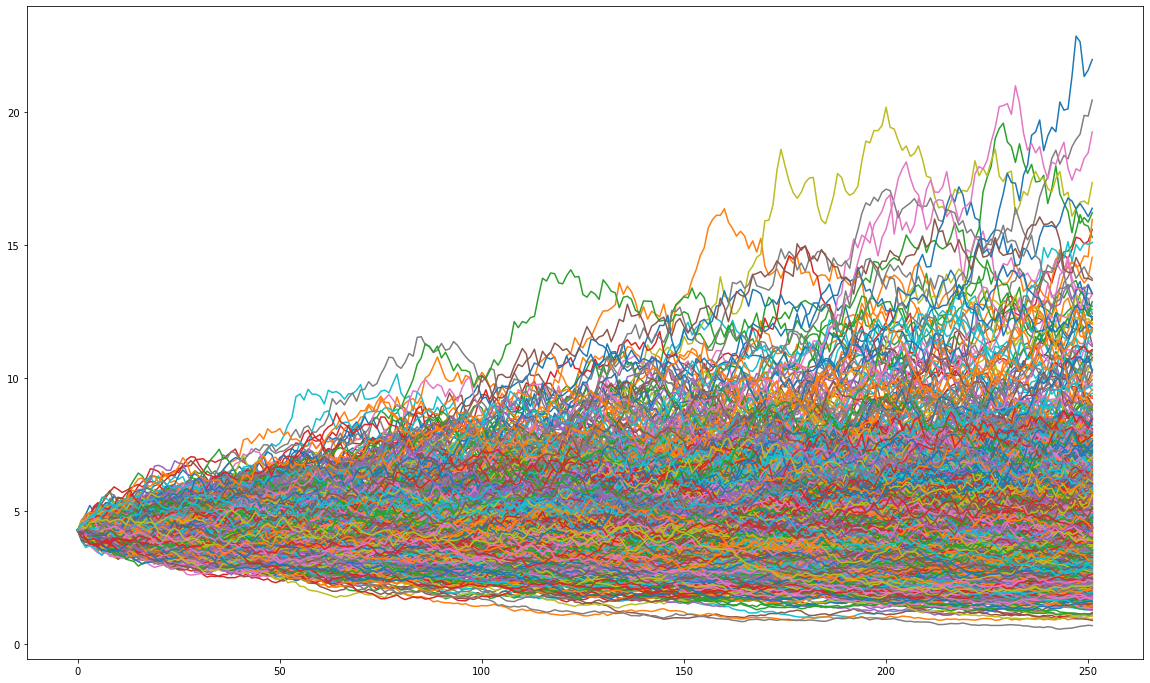

In [88]:
plt.figure(figsize=(20,12))
plt.plot(price_list)

In [89]:
expected_ending_price_point = round(np.mean(price_list),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))
    

Expected Ending Price Point :  4.59


In [93]:
population_mean = (u+1) * S0
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")


Sample Mean :  4.59
Population Mean:  MRO    4.29
dtype: float64
Percent Difference :  MRO   -7.04
dtype: float64 %


In [94]:
top_ten = np.percentile(price_list,100-10)
bottom_ten = np.percentile(price_list,10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  6.72
Bottom 10% :  2.78


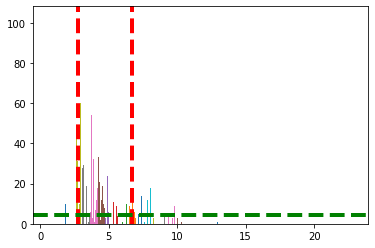

In [109]:
plt.hist(price_list,bins=100)
plt.axvline(top_ten, color='r', linestyle = 'dashed', linewidth=4)
plt.axvline(bottom_ten, color = 'r',linestyle = 'dashed', linewidth= 4)
plt.axhline(np.array(S0),color='g', linestyle='dashed',linewidth=4)
plt.show()
